## Lab 9: ANOVA using Python (with examples)

1. What is ANOVA Analysis 
- ANOVA test used to compare the means of more than 2 groups (t-test or Z-test can be used to compare 2 groups)
- Groups mean differences inferred by analyzing variances
- ANOVA uses variance-based F test to check the group mean equality. Sometimes, - ANOVA F test is also called omnibus test as it tests non-specific null hypothesis i.e. all group means are equal
  - The null hypothesis is tested using the omnibus test (F test) for all groups, which is further followed by post-hoc test to see individual group differences.
- Main types: One-way (one factor) and two-way (two factors) ANOVA (factor is an independent variable)
- It is also called univariate ANOVA as there is only one dependent variable in the model. MANOVA is used when there are multiple dependent variables in the dataset. If there is an additional continuous independent variable in the model, then ANCOVA is used.
- If you have repeated measurements for treatments or time on same subjects, you should use Repeated Measure ANOVA

2. ANOVA Assumptions 
- Residuals (experimental error) are approximately normally distributed    
  - Shapiro-Wilks test or histogram
- Homoscedasticity or Homogeneity of variances (variances are equal between treatment groups) 
  - Levene’s, Bartlett’s, or Brown-Forsythe test
- Observations are sampled independently from each other (no relation in observations between the groups and within the groups) i.e., each subject should have only one response
- The dependent variable should be continuous. If the dependent variable is ordinal or rank (e.g. Likert item data), it is more likely to violate the assumptions of normality and homogeneity of variances. 
  - If these assumptions are violated, you should consider the non-parametric tests (e.g. Mann-Whitney U test, Kruskal-Wallis test).

-----
3. One-way ANOVA with Python 

In [36]:
import pandas as pd 
pipi = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")
pipi

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [37]:
# reshape the d dataframe suitable for statsmodels package 
pipi_melt = pd.melt(pipi.reset_index(),id_vars = ['index'], value_vars = ['A','B','C','D'])
# replace column names
pipi_melt.columns = ['index', 'treatments', 'value']
pipi_melt

,index,treatments,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


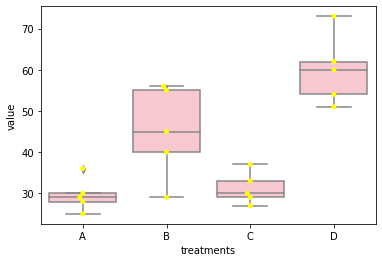

In [38]:
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=pipi_melt, color='pink')
ax = sns.swarmplot(x="treatments", y="value", data=pipi_melt, color='yellow')
plt.show()

In [39]:
import scipy.stats as stats
fvalue,pvalue = stats.f_oneway(pipi['A'],pipi['B'],pipi['C'],pipi['D'])
print(fvalue,pvalue)

17.492810457516338 2.639241146210922e-05


In [40]:
import statsmodels.api as sm
from statsmodels.formula.api import ols 
model = ols('value ~ C(treatments)',data=pipi_melt).fit()
anova=sm.stats.anova_lm(model,typ=2)
print(anova)

                sum_sq    df         F    PR(>F)
C(treatments)  3010.95   3.0  17.49281  0.000026
Residual        918.00  16.0       NaN       NaN


In [41]:
import statsmodels.stats.anova as anova 
anova=anova.anova_lm(model)
print(anova)

                 df   sum_sq   mean_sq         F    PR(>F)
C(treatments)   3.0  3010.95  1003.650  17.49281  0.000026
Residual       16.0   918.00    57.375       NaN       NaN


- Assumption test
  - ANOVA assumptions can be checked using test statistics (e.g. Shapiro-Wilk, Bartlett’s, Levene’s test, Brown-Forsythe test) and the visual approaches such as residual plots (e.g. QQ-plots) and histograms.
  - The visual approaches perform better than statistical tests. For example, the Shapiro-Wilk test has low power for small sample size data and deviates significantly from normality for large sample sizes (say n > 50). For large sample sizes, you should consider to use QQ-plot for normality assumption.

In [57]:
## QQ - Plot for normality
import statsmodels.api as sm
import matplotlib.pyplot as plt
from bioinfokit.analys import stat
res = stat()
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_res_,line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

AttributeError: 'stat' object has no attribute 'anova_res_'

In [60]:
# Shapiro test for normality
fstatistics,pvalue=stats.shapiro(model.resid)
print(fstatistics,pvalue)
# As the p value is non significant, we fail to reject null hypothesis and conclude that data is drawn from normal distribution.

0.9685019850730896 0.7229772806167603


In [61]:
# Barrlett's test for homogeneity of variance 
w,pvalue = stats.bartlett(pipi['A'],pipi['B'],pipi['C'],pipi['D'])
print(w,pvalue)
# As the p value (0.12) is non significant, we fail to reject null hypothesis and conclude that treatments have equal variances.

5.687843565012841 0.1278253399753447


In [67]:
from bioinfokit.analys import stat 
res = stat()
res.levene(df=df_melt, res_var='value', xfac_var='treatments')
res.levene_summary

AttributeError: 'stat' object has no attribute 'levene'

------
4. Two-way ANOVA test

- From dataset, there are two factors (independent variables) viz. genotypes and yield in years. Genotypes and years has six and three levels respectively (see one-way ANOVA to know factors and levels).
- From two-way ANOVA, we can tests three hypotheses 1) effect of genotype on yield 2) effect of time (years) on yield, and 3) effect of genotype and time (years) interactions on yield

In [68]:
import pandas as pd 
import seaborn as sns 
d = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/twowayanova.txt", sep="\t")
d

,Genotype,1_year,2_year,3_year
0,A,1.53,4.08,6.69
1,A,1.83,3.84,5.97
2,A,1.38,3.96,6.33
3,B,3.60,5.70,8.55
4,B,2.94,5.07,7.95
5,B,4.02,7.20,8.94
6,C,3.99,6.09,10.02
7,C,3.30,5.88,9.63
8,C,4.41,6.51,10.38
9,D,3.75,5.19,11.40


In [78]:
# Reshape the d dateframe suitable for statsmodel package 
# If the data is already in stacked format, it is not necessary to reshape 
d_melt = pd.melt(d, id_vars= ['Genotype'], value_vars=['1_year','2_year','3_year'])
# Replace column names 
d_melt.columns = ['Genotype', 'years', 'value']
d_melt.head()

,Genotype,years,value
0,A,1_year,1.53
1,A,1_year,1.83
2,A,1_year,1.38
3,B,1_year,3.60
4,B,1_year,2.94


<AxesSubplot:xlabel='Genotype', ylabel='value'>

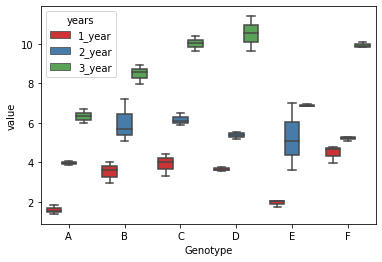

In [80]:
# Boxplot to see data distribution 
sns.boxplot(x="Genotype", y="value", hue="years", data=d_melt, palette="Set1") 

In [81]:
# anova analysis 
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('value ~ C(Genotype) + C(years) + C(Genotype):C(years)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Genotype),58.551733,5.0,32.748581,1.931655e-12
C(years),278.925633,2.0,390.014868,4.006243e-25
C(Genotype):C(years),17.122967,10.0,4.788525,2.230094e-04
Residual,12.873000,36.0,NaN,NaN


In [82]:
anova_table=anova.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Genotype),5.0,58.551733,11.710347,32.748581,1.931655e-12
C(years),2.0,278.925633,139.462817,390.014868,4.006243e-25
C(Genotype):C(years),10.0,17.122967,1.712297,4.788525,2.230094e-04
Residual,36.0,12.873000,0.357583,NaN,NaN


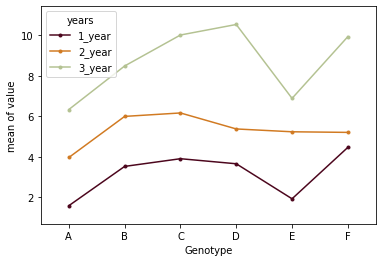

In [84]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=d_melt['Genotype'], trace=d_melt['years'], response=d_melt['value'], 
    colors=['#4c061d','#d17a22', '#b4c292'])
plt.show()